In [1]:
# Add local scripts to module search path
import sys
import os
sys.path.append(os.path.realpath('../toliman-proper'))

## Comparison of conic vs. quad mirror PSFs for TOLIMAN using PROPER

In [2]:
quad_settings = {
                    'diam': 0.001 * 2. * 150, 
                    'm1_fl': 0.5717255, 
                    'm1_m2_sep': 0.54933763033373, 
                    'm2_fl': -0.02337895948640,  
                    'bfl': 0.52761,  
                    'm2_rad': 0.00590401477581,
                    'm2_strut_width': 0.01,
                    'm2_supports': 5,
                    'beam_ratio': 0.2
                    }
conic_settings = quad_settings.copy()
conic_settings['m1_conic'] = -1.00011470000000
conic_settings['m2_conic'] = -1.16799179177759


In [3]:
%matplotlib inline
import proper
import numpy as np
import matplotlib.pylab as plt

def toliman_plot(settings, prescription):
    wavelength = 0.6 # microns
    gridsize = 2048 #512
    (wavefront, sampling) = proper.prop_run(prescription, wavelength, gridsize, PASSVALUE=settings)

    # Plot entire wavefront
    plt.imshow(np.log10(wavefront), interpolation = 'None', cmap='viridis')
    plt.colorbar()
    plt.show()

    # Log plot
    c = int(gridsize/2)
    sz = 80
    im = wavefront[c-sz:c+sz, c-sz:c+sz]
    #im = np.abs(im)**2 # For if you had NOABS=True
    plt.imshow(np.log10(im), interpolation = 'None', cmap='viridis', clim=[-7, -1.6])
    plt.colorbar()
    plt.show()

    # Linear plot
    # c = gridsize/2
    # sz = 20
    # im = wavefront[c-sz:c+sz, c-sz:c+sz]
    # #im = np.abs(im)**2
    # plt.imshow(im, interpolation = 'None', cmap='viridis')

/home/ubuntu/miniconda/envs/astroconda/lib/python3.5/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


##  Quadratic (paraboloid) mirrors

Lambda = 6.0000E-07   Throughput = 1.00
Applying lens at primary
Propagating to secondary
Applying lens at secondary
Propagating to M1 hole
Propagating to focus
Total elapsed time (seconds) =  16.1677


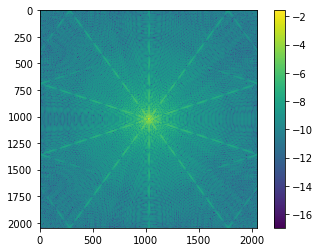

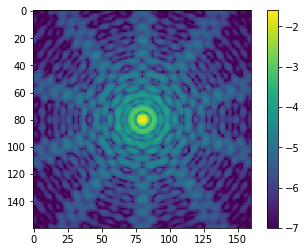

In [4]:
toliman_plot(quad_settings, 'prescription_rc_quad')

##  Conic mirrors

Lambda = 6.0000E-07   Throughput = 1.00
Propagating to focus
Total elapsed time (seconds) =   3.3690


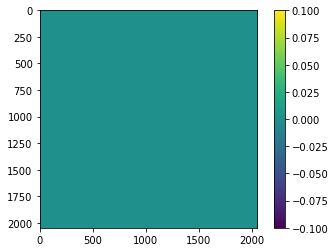

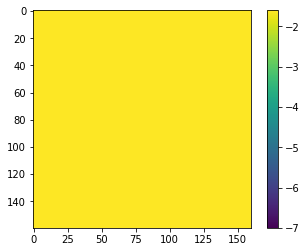

In [5]:
toliman_plot(conic_settings, 'prescription_rc_conic')